![imagen](../../images/ejercicios.png)

# Ejercicio 1 

Carga los datos de imagenes de gatos y perros alojados en:

https://raw.githubusercontent.com/bioramble/pca/master/cat.csv

https://raw.githubusercontent.com/bioramble/pca/master/dog.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
cats=np.array(pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/cat.csv', header=None))
dogs=np.array(pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/dog.csv', header=None))

In [3]:
print(cats.shape)
print(dogs.shape)

(4096, 80)
(4096, 80)


In [4]:
cats[0]

array([ 64,  23, 250, 137,  55, 173,  18, 134,  19,  47, 109, 164,  41,
        78, 108, 108, 247, 105, 158,  54, 103,   4,  23, 102, 239,  72,
        42,  21, 168, 109, 112, 177,  22, 233,  15, 236, 250, 137,  32,
         5, 178, 109,  24, 107,  53, 241, 226, 143,   5, 136,  98, 100,
        89,  66, 228,  92, 255,  88, 230,  56, 160,  69,   6,  24, 195,
       183, 239,  35, 154, 154, 122,  18,  87, 106, 174,  69,  28,  60,
       223, 101])

# Ejercicio 2

Realiza un plot con una imagen de un gato y una imagen de una perro.

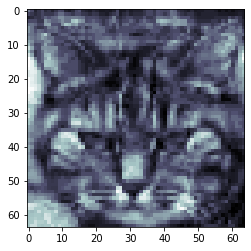

In [5]:
fig, ax=plt.subplots()

ax.imshow(cats[:,30].reshape(64, 64).T, cmap=plt.cm.bone);

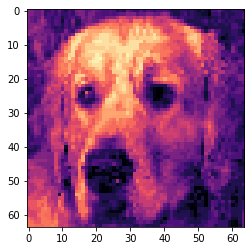

In [6]:
fig, ax=plt.subplots()

ax.imshow(dogs[:,8].reshape(64, 64).T, cmap='magma');

# Ejercicio 3

Normaliza los datos y concatena ambos arrays.

In [7]:
def standardize(x):
    x=(x-np.mean(x, axis=0))/np.std(x, axis=0)
    return x

In [8]:
animals=np.concatenate((dogs, cats), axis=1)

In [9]:
animals_stand=standardize(animals)

animals_stand.shape

(4096, 160)

# Ejercicio 4

Realiza la transformacion PCA para bajar a 2 y/o 3 componentes.

**Tip: Realiza el producto escalar np.dot entre los datos normalizados y los datos de PCA. La dimesion final ha de ser (160, 2) y/o (160, 3)**

In [10]:
# 2 componentes

pca=PCA(n_components=2).fit_transform(animals_stand)

pca.shape

(4096, 2)

In [11]:
data_2=np.dot(animals_stand.T, pca)

data_2.shape

(160, 2)

In [12]:
# 3 componentes

pca=PCA(n_components=3).fit_transform(animals_stand)

pca.shape

(4096, 3)

In [13]:
data_3=np.dot(animals_stand.T, pca)

data_3.shape

(160, 3)

# Ejercicio 5

Representa los datos y trata de separarlos en el grafico.

In [14]:
# 2 componentes

proyection=pd.DataFrame(data_2, columns=['pc1', 'pc2'])

proyection.head()

,pc1,pc2
0,14348.514040,-3981.259727
1,10873.022744,5211.510571
2,-4378.848118,4874.922827
3,1717.007483,8914.443053
4,11101.884044,-1114.370818


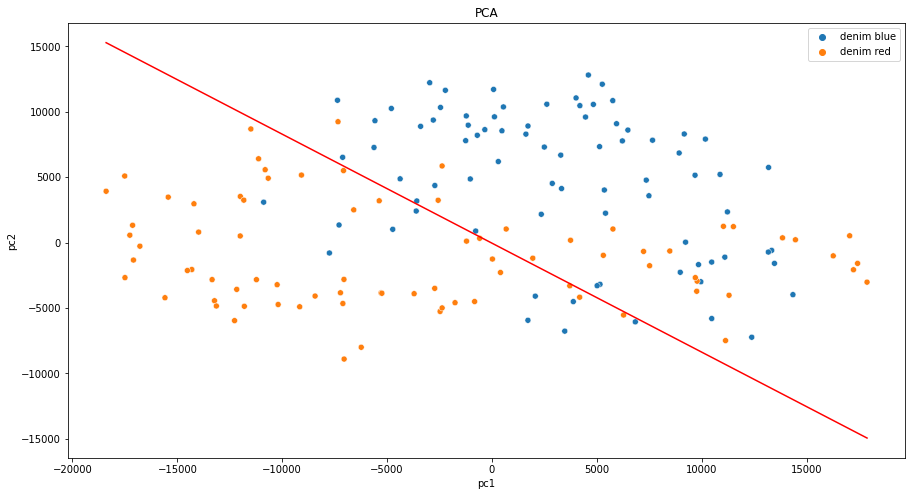

In [15]:
blue=['denim blue' for i in range(80)]
red=['denim red' for i in range(80)]

colors=blue+red

plt.figure(figsize=(15,8))
sns.scatterplot(proyection.pc1, proyection.pc2, hue=colors)       # azul=perros, rojo=gatos

sns.lineplot(proyection.pc1, (-5/6)*proyection.pc1-45, color='r')
plt.legend()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA')
plt.show();

In [16]:
# 3 componentes

proyection=pd.DataFrame(data_3, columns=['pc1', 'pc2', 'pc3'])

proyection.head()

,pc1,pc2,pc3
0,14348.514025,-3981.259281,-3910.472888
1,10873.022769,5211.510007,-1122.521133
2,-4378.848090,4874.922324,-3833.752875
3,1717.007497,8914.442805,1511.049201
4,11101.884023,-1114.370463,4519.994820


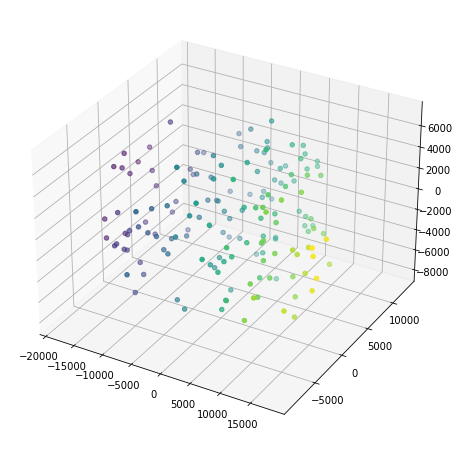

In [17]:
fig=plt.figure(figsize=(15,8))

ax=fig.gca(projection='3d')

ax.scatter(proyection.pc1, proyection.pc2, proyection.pc3, c=proyection.pc1)
plt.show();